In [1]:
from sympy import *
import matplotlib.pyplot as plt
import numpy as np

In [2]:
x, r, R, theta, mu, G, M, g = symbols('x r R theta mu G M g')
n = symbols('n', integer=True)
f, genfun, phi = symbols('f genfun phi', cls=Function)

genfun = 1/sqrt(1+x**2-2*x*cos(theta))
genfun

1/sqrt(x**2 - 2*x*cos(theta) + 1)

In [3]:
genfun.series(x,0,4)

1 + x*cos(theta) + x**2*(3*cos(theta)**2/2 - 1/2) + x**3*(5*cos(theta)**3/2 - 3*cos(theta)/2) + O(x**4)

In [4]:
getfunc_trunc = (genfun.series(x,0,4)).removeO()
getfunc_trunc
coeff = [getfunc_trunc.coeff(x,i).factor() for i in range(4)]
coeff
integral = integrate(getfunc_trunc, (theta,0,pi))
integral


pi*x**2/4 + pi

In [5]:
phi = -2*mu*G*integral
phi

-2*G*mu*(pi*x**2/4 + pi)

In [6]:
f = phi.subs({mu:M/(2*pi*R)})
print ("The gravitational potential of the ring is")
f

The gravitational potential of the ring is


-G*M*(pi*x**2/4 + pi)/(pi*R)

In [7]:
phi_r = (f.subs({x:(r/R)})).simplify()
phi_r

-G*M*(4*R**2 + r**2)/(4*R**3)

In [8]:
RJ = 7.784e11  # radius of Jupiter's orbit in m
MJ = 1.90e27   # Jupiter's mass in kg
GN = 6.674e-11 # Newton's gravitational constant in SI units
RE = 1.4964e11  # radius of Earth's orbit in m

fJE = (f.subs({G:GN, M:MJ, R:RJ, x:(RE/RJ)})) # substituting the above values in the expression for f we found above
print ("The gravitational potential of Jupiter's ring",\
       "at Earth's orbit is",fJE,"SI units")

The gravitational potential of Jupiter's ring at Earth's orbit is -164411.065705455 SI units


In [9]:
# to find the gravitational acceleration along r
# differentiate the last expression with respect to r  (recall that g is the gradient of the potential)
# after substituting x=R/r into it
g = ((f.subs({x:(R/r)}).diff(r))).simplify()
g

G*M*R/(2*r**3)

In [10]:
# compute a dimensionless gravitational potential by
# dividing f by the point-mass potential -GM/r  
ff = f.subs({R:(r*x)})/(-G*M/r)
ff

(pi*x**2/4 + pi)/(pi*x)

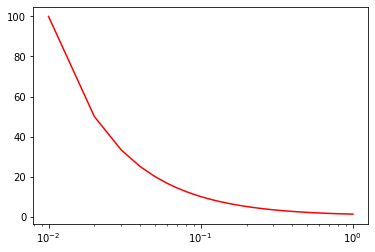

In [11]:
nn = 100
xn = np.linspace(1e-2,1.,nn)  # From the edge of the ring to a 100 times the radius.
yn = np.linspace(0,0,nn)
for i in range(nn):
    yn[i] = ff.subs({x:xn[i]})
    
plt.semilogx(xn,yn,'r')



In [17]:
def Nphi(r,N2,G,M,R):
    Nphi = 0.
    x = r/R
    a = np.pi/float(N2)
    
    for i in range(N2+1):
        f = 2.
        if i==0 or i == N2:
            f = 1.
        Nphi += f/np.sqrt(1+x**2-2*x*np.cos(i*a))
    Nphi = -G*(M/float(2*N2)/R)*Nphi
    return Nphi


In [18]:
int2 = 1

InitialPhiApp = Nphi(RE,int2,GN,MJ,RJ)
int2 += 1

phiApp = Nphi(RE,int2,GN,MJ,RJ)
while abs((phiApp-InitialPhiApp)/phiApp) > 1e-4 and int2 < 200:
    InitialPhiApp = phiApp
    int2 += 1
    phiApp = Nphi(RE,int2,GN,MJ,RJ)



print ("phi n =",InitialPhiApp)
print ("phi n+1 =",phiApp)
print ("n =",2*int2, "points gives an accuracy of 0.0001")

phi n = -164446.9554708689
phi n+1 = -164443.30168680983
n = 8 points gives an accuracy of 0.0001


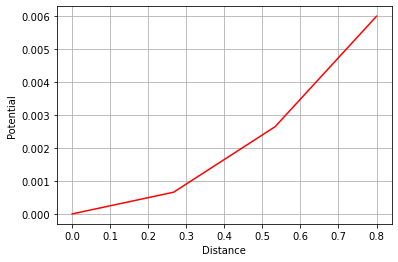

In [19]:
n = 4

rplot = np.linspace(0,0.8,n)
phiplot = np.linspace(0,0,n)
phipoint = -GN*MJ/RJ


for k in range(n):
        phiplot[k] = Nphi(rplot[k]*RE,144,GN,MJ,RJ)/phipoint

plt.plot(rplot,phiplot-phiplot[0],'r-',label='solution')

plt.xlabel('Distance')
plt.ylabel('Potential')

plt.grid()
plt.show()

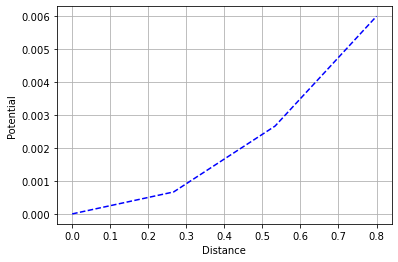

In [21]:
x = np.linspace(0,0,n) #r = 0
y = np.linspace(0,0,n)

for k in range(n):
        x[k] = rplot[k]
        y[k] = (phiplot[-1]-phiplot[0])*(rplot[k]/rplot[-1])**2

plt.plot(x,y,'b--')
plt.xlabel('Distance')
plt.ylabel('Potential')

plt.grid()
plt.show()